# 3.8 Time Series

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the data

### 1. Importing libraries and data

In [63]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [64]:
path = r"C:\Users\dsadl\OneDrive\Documents\Career Foundry\Data Immersion\Project 6"

In [65]:
df = pd.read_csv(os.path.join(path, 'Food Environment Analysis', '02 Data', 'Original Data','snap_participation_1969_2022.csv'), index_col=False)

In [66]:
df.head()

,Year,Average Participation (Thousands)
0,12/31/1969,2878
1,12/31/1970,4340
2,12/31/1971,9368
3,12/31/1972,11109
4,12/31/1973,12166


In [67]:
df.columns

Index(['Year', 'Average Participation (Thousands)'], dtype='object')

### 2. Subsetting, wrangling, and cleaning time-series data

In [68]:
# Check column data types

df.dtypes

Year                                 object
Average Participation (Thousands)     int64
dtype: object

In [69]:
# Change data type from object to datetime

pd.to_datetime(df['Year'])

0    1969-12-31
1    1970-12-31
2    1971-12-31
3    1972-12-31
4    1973-12-31
5    1974-12-31
6    1975-12-31
7    1976-12-31
8    1977-12-31
9    1978-12-31
10   1979-12-31
11   1980-12-31
12   1981-12-31
13   1982-12-31
14   1983-12-31
15   1984-12-31
16   1985-12-31
17   1986-12-31
18   1987-12-31
19   1988-12-31
20   1989-12-31
21   1990-12-31
22   1991-12-31
23   1992-12-31
24   1993-12-31
25   1994-12-31
26   1995-12-31
27   1996-12-31
28   1997-12-31
29   1998-12-31
30   1999-12-31
31   2000-12-31
32   2001-12-31
33   2002-12-31
34   2003-12-31
35   2004-12-31
36   2005-12-31
37   2006-12-31
38   2007-12-31
39   2008-12-31
40   2009-12-31
41   2010-12-31
42   2011-12-31
43   2012-12-31
44   2013-12-31
45   2014-12-31
46   2015-12-31
47   2016-12-31
48   2017-12-31
49   2018-12-31
50   2019-12-31
51   2020-12-31
52   2021-12-31
53   2022-12-31
Name: Year, dtype: datetime64[ns]

In [70]:
df.head()

,Year,Average Participation (Thousands)
0,12/31/1969,2878
1,12/31/1970,4340
2,12/31/1971,9368
3,12/31/1972,11109
4,12/31/1973,12166


### Data exclusion discussion: 
Puerto Rico was included in the U.S. federal nutrition program funding from 1975 - 1982, at which time they received their own Nutrition Assistance Program grant. Therefore, I created a subset of data to use here that includes just the data from 1983-2022.

In [73]:
# Create subset of dates from 1983-2022

df_sub = df.loc[(df['Year'] >= '12/31/1983')]

In [74]:
df_sub.shape

(40, 2)

In [75]:
df_sub.head()

,Year,Average Participation (Thousands)
14,12/31/1983,21625
15,12/31/1984,20854
16,12/31/1985,19899
17,12/31/1986,19429
18,12/31/1987,19113


In [76]:
# Set the "Year" column as the index

from datetime import datetime

df_sub['datetime'] = pd.to_datetime(df_sub['Year']) # Create a datetime column from "Date"
df_sub = df_sub.set_index('datetime') # Set the datetime as the index of the dataframe
df_sub.drop(['Year'], axis=1, inplace=True) # Drop the "Year" column
df_sub.head()

,Average Participation (Thousands)
datetime,
1983-12-31,21625
1984-12-31,20854
1985-12-31,19899
1986-12-31,19429
1987-12-31,19113


In [ ]:
# Plot the subset

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [79]:
# Check for missing values (you shouldn't have any)

df_sub.isnull().sum() 

Average Participation (Thousands)    0
dtype: int64

In [82]:
# Check for duplicates

dups = df_sub.duplicated()
dups.sum()

# No duplicates

0

### 3. Time-series analysis: decomposition

In [84]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive')

In [85]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

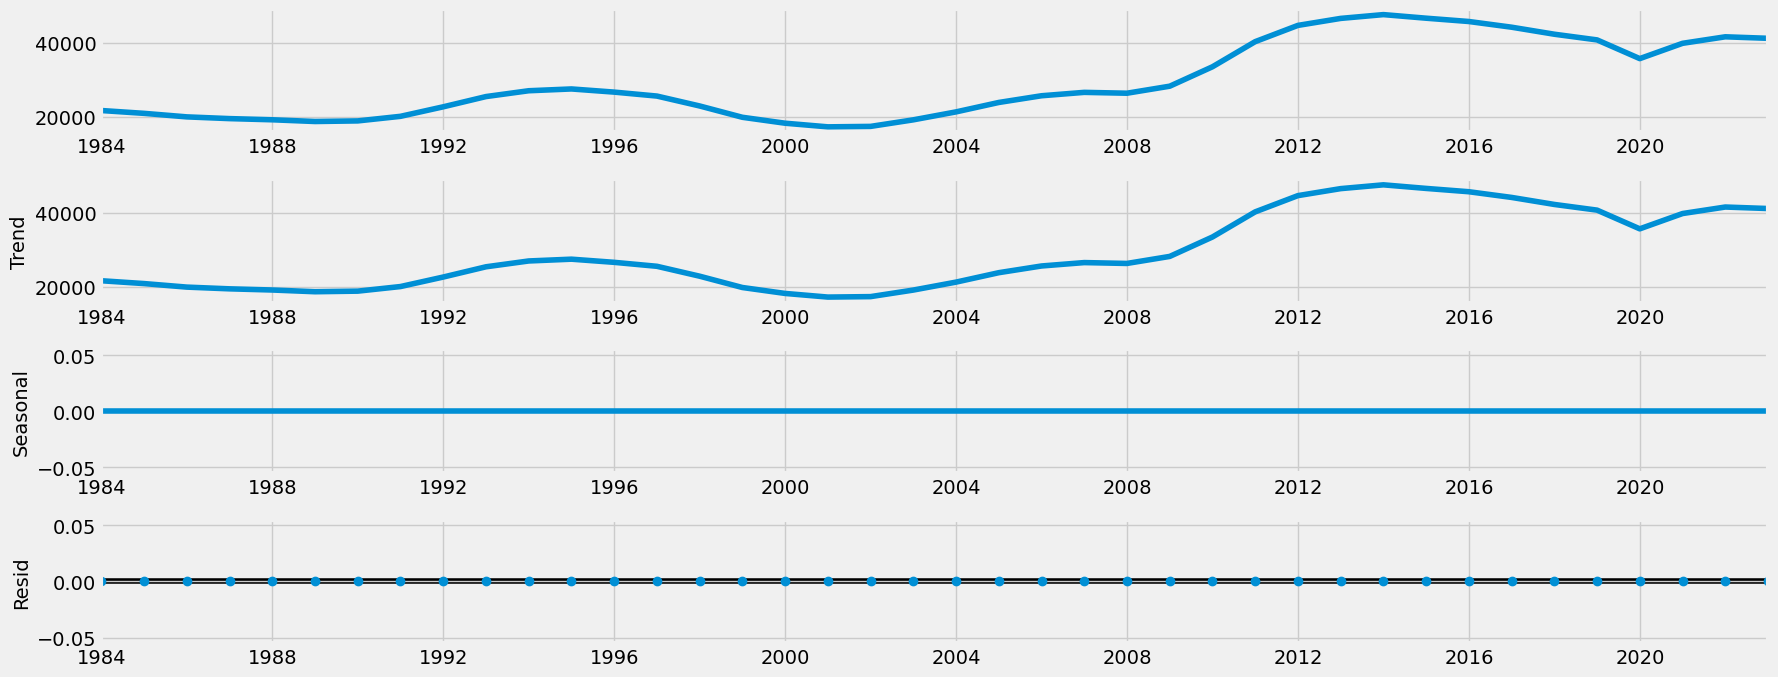

In [86]:
# Plot the separate components

decomposition.plot()
plt.show()

### Discussion of decomposition:
The data was decomposed using an additive model. The trend and the level appear the same, indicating that there isn't much noise in the data. Aside from a few fluctuations, the dominant trend is a gradual increase in SNAP participants since 1984. The fluctuations appear as cycles rather than seasonality. There isn't any seasonality, as shown by the flat line for this value. And there isn't any noise, as indicated by the residual graph of a straight line. Overall, the results of the decomposition indicate that the data is non-stationary, but I will verify with the Dickey-Fuller Stationarity test.

### 4. Testing for stationarity

In [89]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub['Average Participation (Thousands)'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.436761
p-value                         0.564531
Number of Lags Used             1.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


### Stationarity discussion:
The Dickey-Fuller test was used to check for patterns in the data that aren't explained by variation. This is testing my null hypothesis, that there is a factor outside of variation impacting the data. I need to disprove the null hypothesis to show that the data is staionary before I can use it for forecasting. The test statistic is larger than each of the critical values, so I can't reject the null hypothesis in this case. That indicates that the data is non-stationary.

### 5. Stationarizing the SNAP Participants data

In [92]:
df_diff = df_sub - df_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [93]:
df_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing, removed to run the Dickey-Fuller test.

In [94]:
df_diff.head()

,Average Participation (Thousands)
datetime,
1984-12-31,-771.0
1985-12-31,-955.0
1986-12-31,-470.0
1987-12-31,-316.0
1988-12-31,-468.0


In [95]:
df_diff.columns

Index(['Average Participation (Thousands)'], dtype='object')

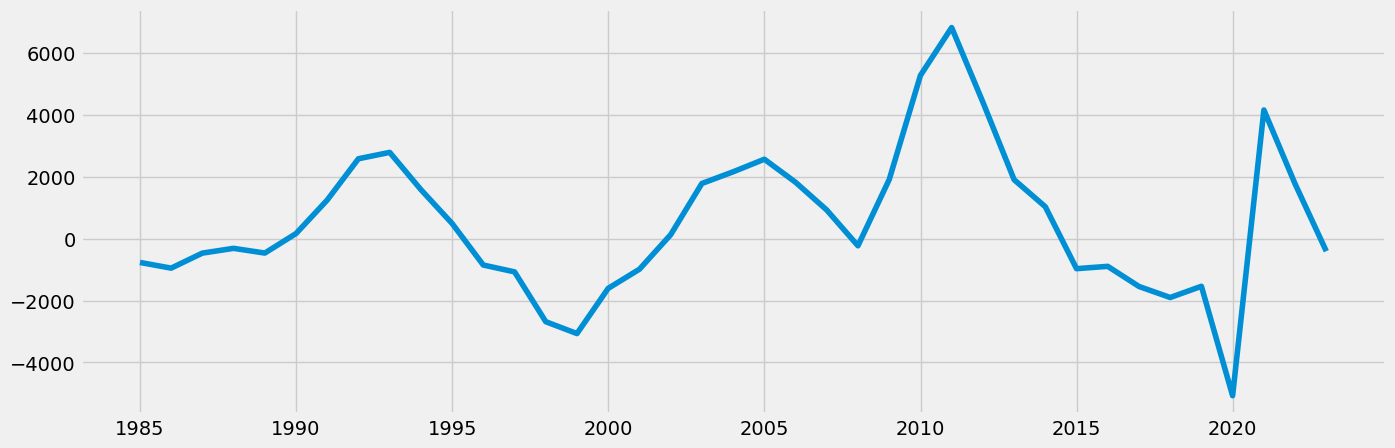

In [96]:
# Run the graph for values after the  differencing

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [97]:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.984758
p-value                         0.036342
Number of Lags Used             0.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


#### After the differencing, the test statistic is less than the 5% critical value, which indicates that I can now reject the null hypothesis and consider the data stationary. There is also a satisfactory p-value < 0.05.

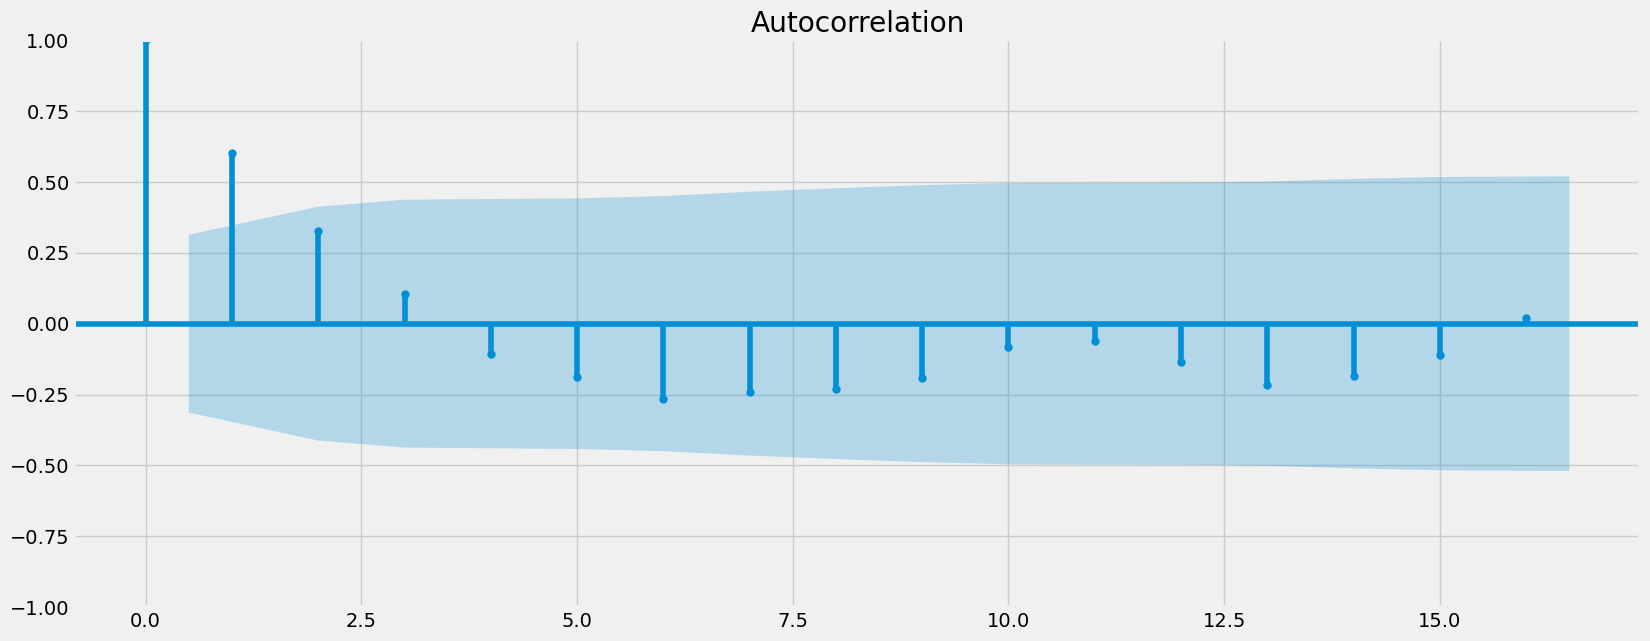

In [98]:
# Plot the autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # import the autocorrelation and partial correlation plots

plot_acf(df_diff)
plt.show()

#### Testing for autocorrelation indicates that there are 2 autocorrelated terms. This is less than the 10 significant lags that would indicate the need for more differencing. This demonstrates that the data can now be used for forecasting.